# CHAPTER 04. 분류


## 01. 분류(Classification)의 개요



## 02. 결정 트리
- 데이터 균일도가 높게끔 데이터를 분리함.



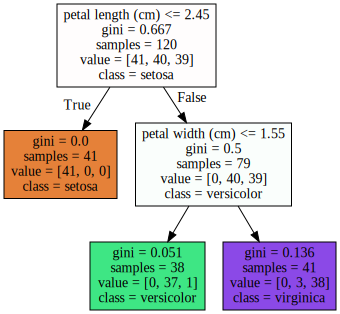

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

dt_clf = DecisionTreeClassifier(random_state=156, max_depth=2)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)
dt_clf.fit(X_train, y_train)


from sklearn.tree import export_graphviz
import graphviz


export_graphviz(dt_clf, out_file="dot/tree.dot", class_names= iris_data.target_names, feature_names= iris_data.feature_names, impurity=True, filled=True)

with open("dot/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 하이퍼 파라미터 디폴트로 하면 지니계수 0 될 때까지 리프노드 나눔


<AxesSubplot:>

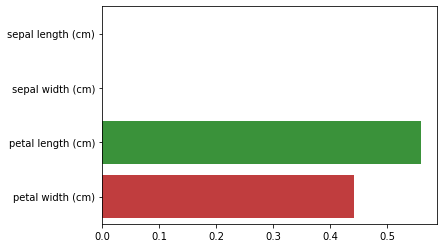

In [15]:
import seaborn as sns
import numpy as np
%matplotlib inline

sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

### 결정 트리 과적합


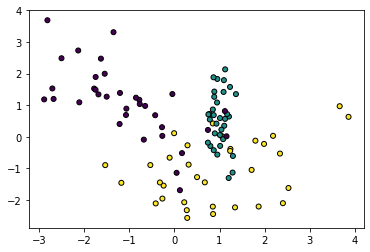

In [23]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

X_features, y_lables = make_classification(n_features=2, n_redundant=0, n_informative=2,n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:, 0], X_features[:, 1], marker= "o", c = y_lables, s= 25, edgecolors="k")

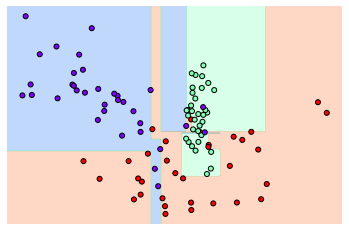

In [24]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

dt_clf = DecisionTreeClassifier().fit(X_features, y_lables)
visualize_boundary(dt_clf, X_features, y_lables)

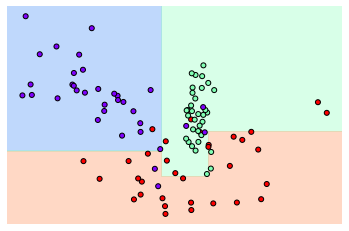

In [25]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_lables)
visualize_boundary(dt_clf, X_features, y_lables)

## 결정 트리 실습 - 사용자 행동 인식 데이터 세트
